---

##  Dataset Explanation – `Crop_recommendation (1).csv`

This dataset is created to support smart agricultural practices by recommending the most suitable crop to grow based on **soil composition** and **climatic conditions**.
It is a **clean**, **well-balanced**, and **ready-to-model** dataset that fits perfectly for multi-class classification tasks using both traditional ML and DL models.

---

###  Dataset Overview:

* **Total Rows:** 2200
* **Total Features:** 7 input features + 1 target (crop label)
* **Missing Values:** None
* **Problem Type:** Multiclass classification
* **Target Variable:** `label` (crop name such as rice, maize, mango, etc.)

---

##  Feature Summary

| Feature         | Data Type   | Description                                                                |
| --------------- | ----------- | -------------------------------------------------------------------------- |
| **N**           | Integer     | Nitrogen content in the soil (promotes leafy growth and chlorophyll)       |
| **P**           | Integer     | Phosphorus content in the soil (supports root development and flowering)   |
| **K**           | Integer     | Potassium content in the soil (improves crop health and stress resistance) |
| **temperature** | Float       | Environmental temperature in Celsius (affects growth and germination)      |
| **humidity**    | Float       | Relative humidity in % (influences transpiration and plant respiration)    |
| **ph**          | Float       | Acidity or alkalinity of the soil (affects nutrient absorption efficiency) |
| **rainfall**    | Float       | Rainfall amount in mm (critical for hydration and root health)             |
| **label**       | Categorical | Recommended crop name (target variable – e.g., rice, coconut, banana)      |

---

# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import shap
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-05-27 13:54:53.723171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748354094.046193      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748354094.135372      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


# Data Load & Overview

## Load Dataset & Overview

In [2]:
df = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

## Display basic info

In [3]:
print("Shape:", df.shape)

Shape: (2200, 8)


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Data Preprocessing

In [8]:
print("\nClass Distribution:\n", df['label'].value_counts())


Class Distribution:
 label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


## Feature and target separation

In [9]:
X = df.drop('label', axis=1)
y = df['label']

## Scaling

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=537, stratify=y)

# EDA

## Set style

In [12]:
sns.set(style="whitegrid")

## Plot 1: Crop Type Distribution (Bar Plot)

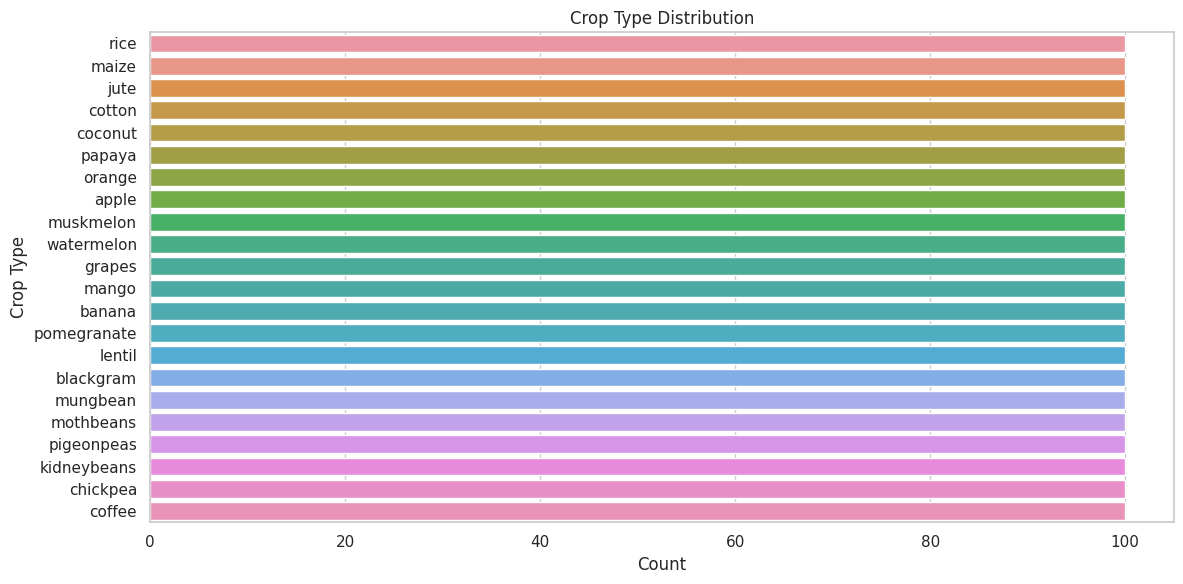

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y="label", data=df, order=df['label'].value_counts().index)
plt.title("Crop Type Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.tight_layout()
plt.show()

## Plot 2–8: Distribution of Numeric Features

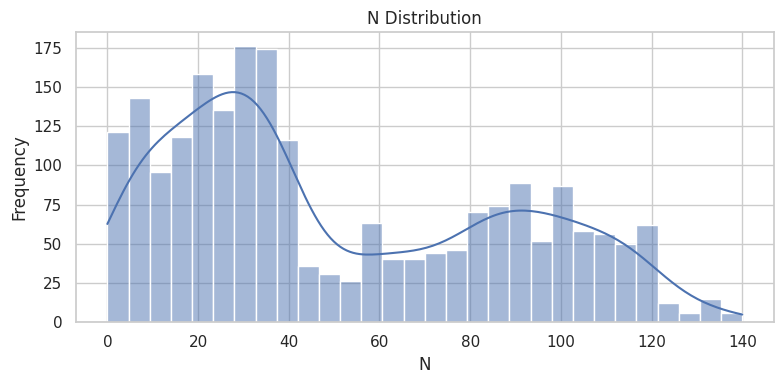

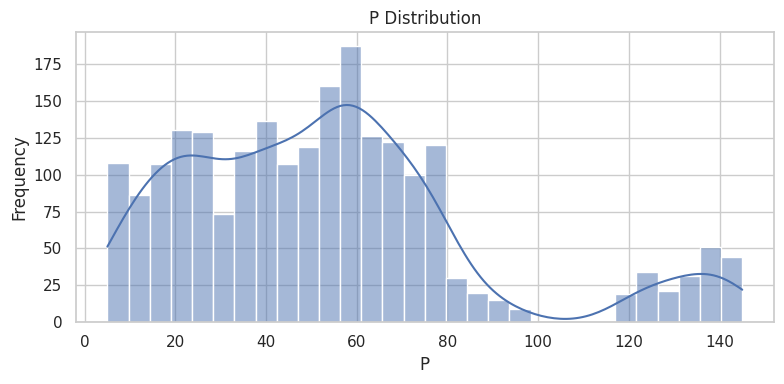

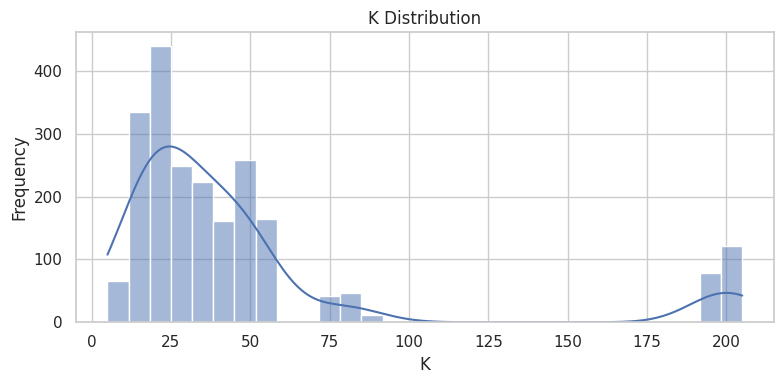

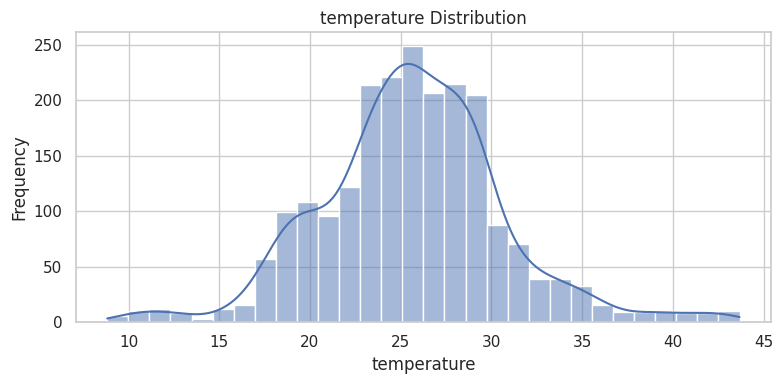

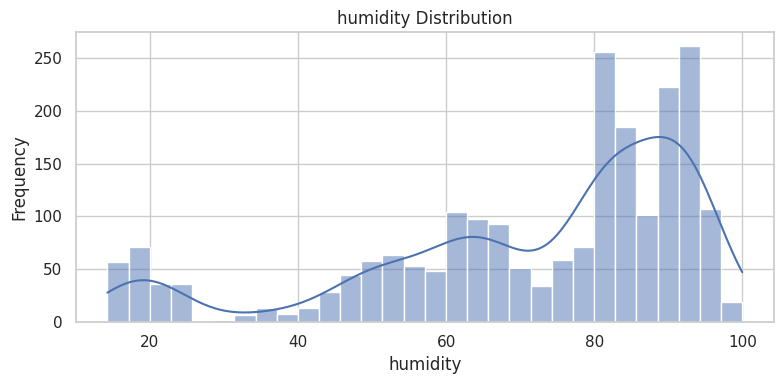

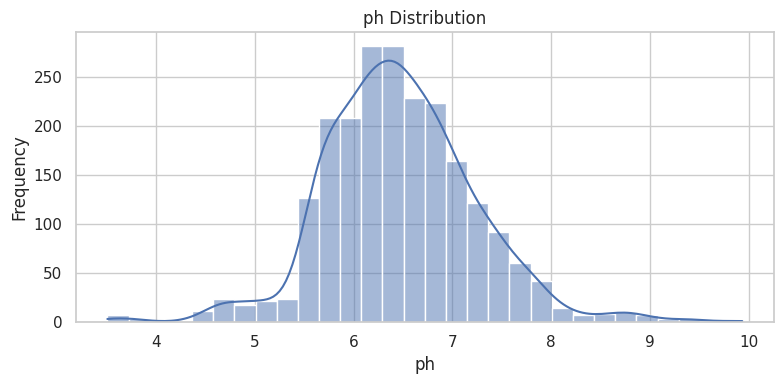

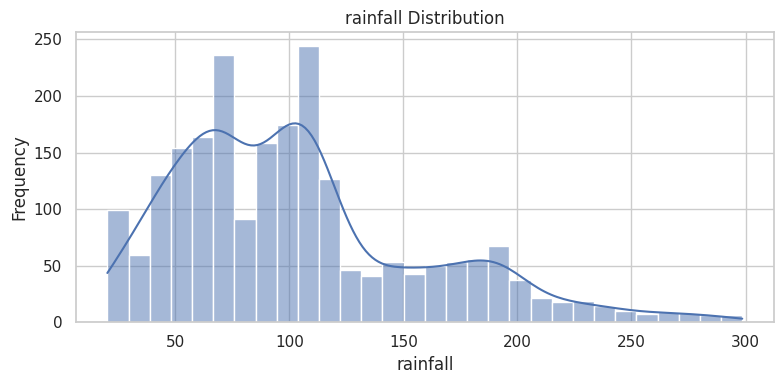

In [14]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

## Plot 9–15: Boxplot per Crop Type (per Feature)

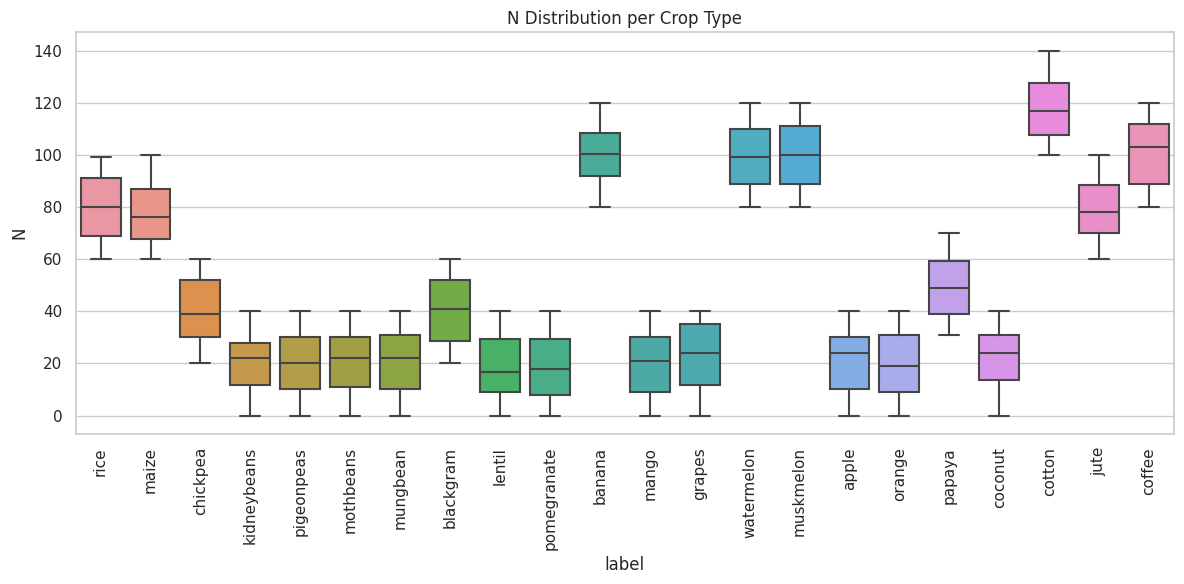

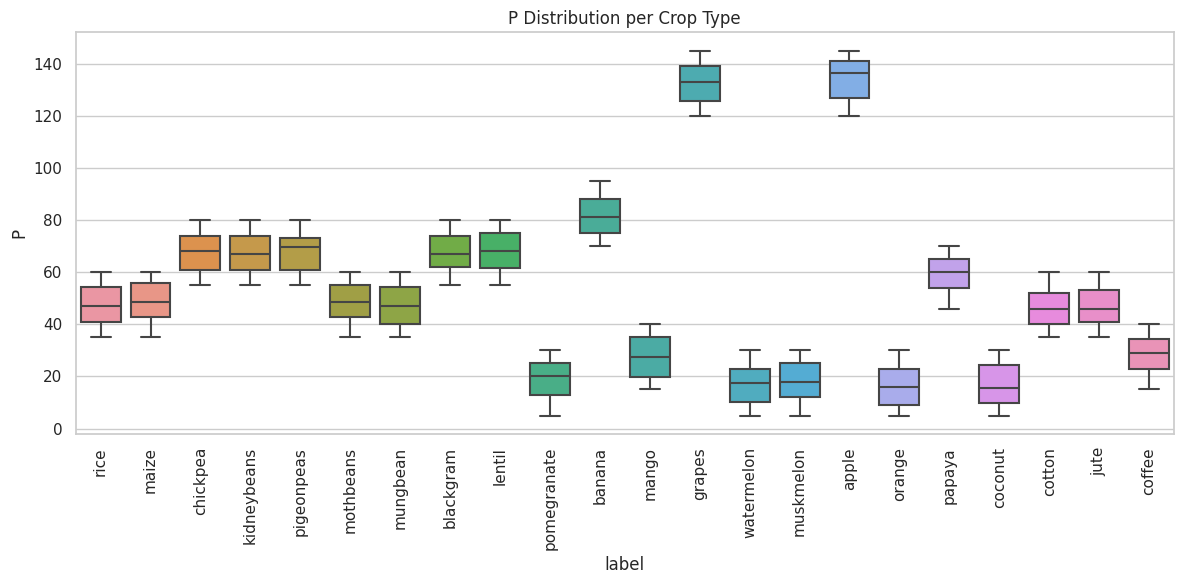

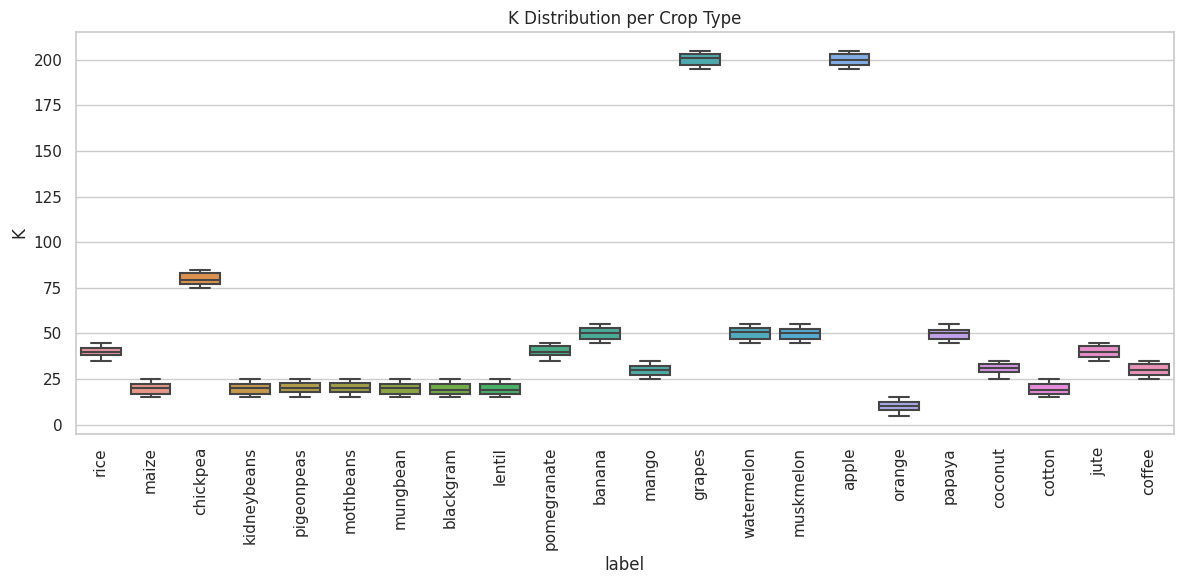

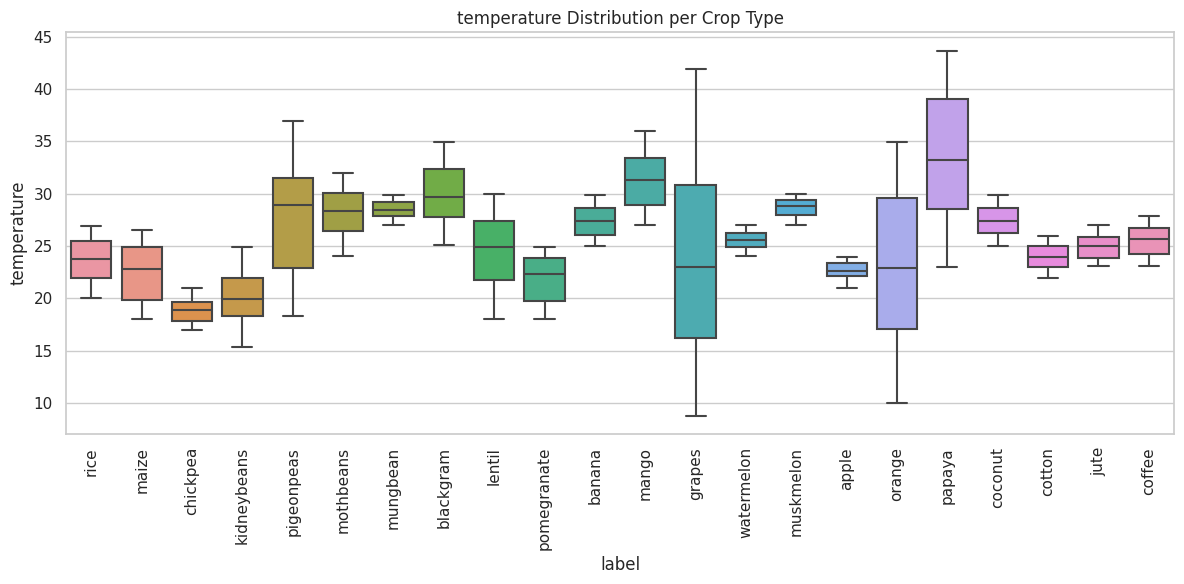

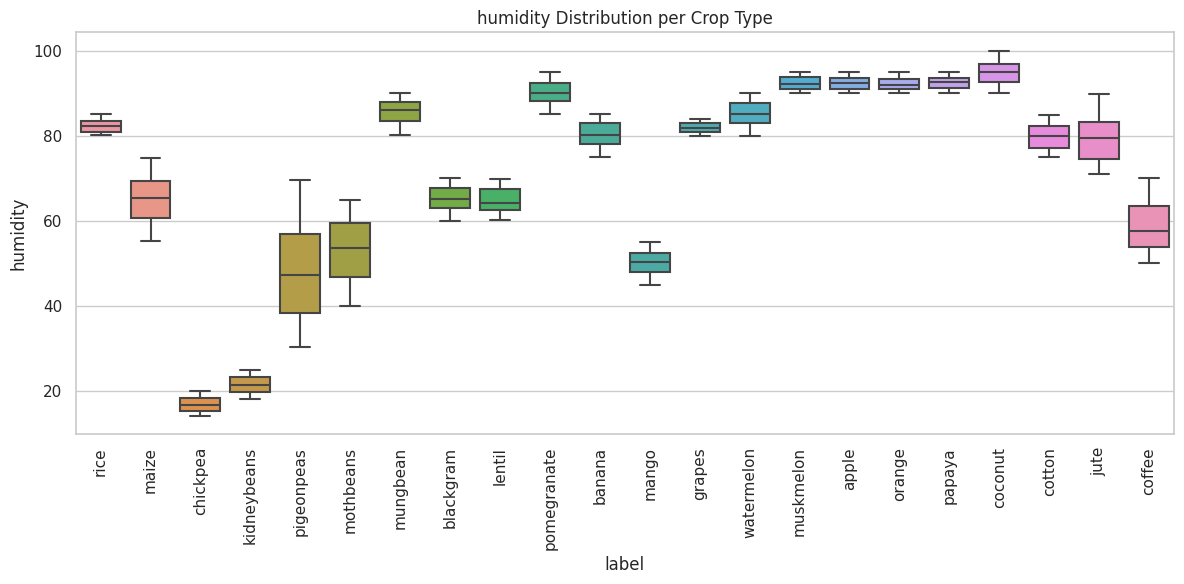

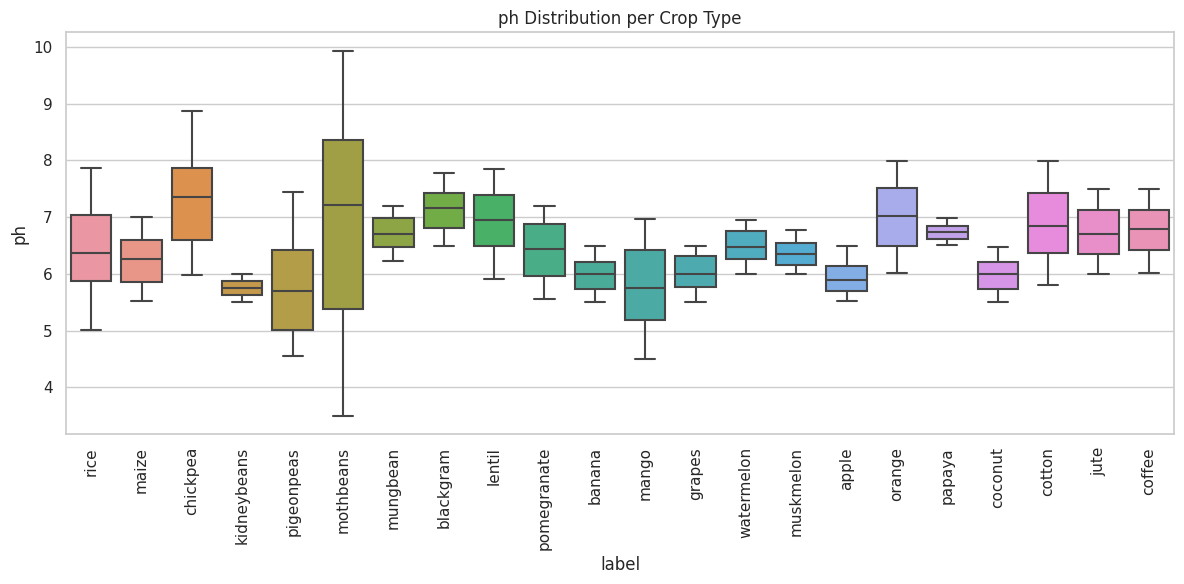

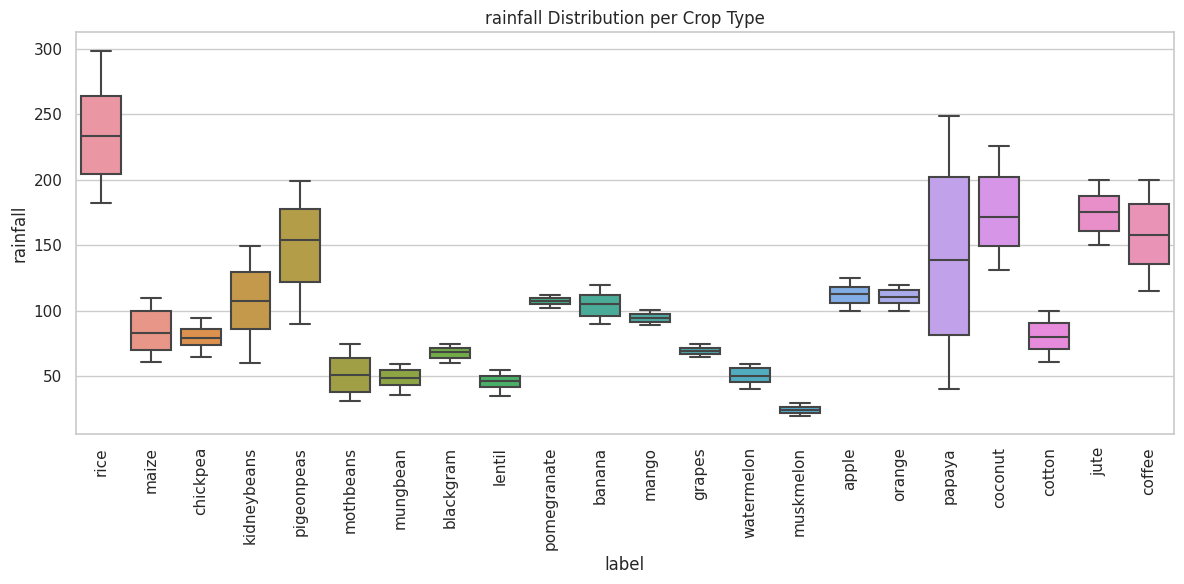

In [15]:
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="label", y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title(f"{feature} Distribution per Crop Type")
    plt.tight_layout()
    plt.show()

# Feature Engineering & Correlation Analysis

In [16]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

## Correlation Heatmap

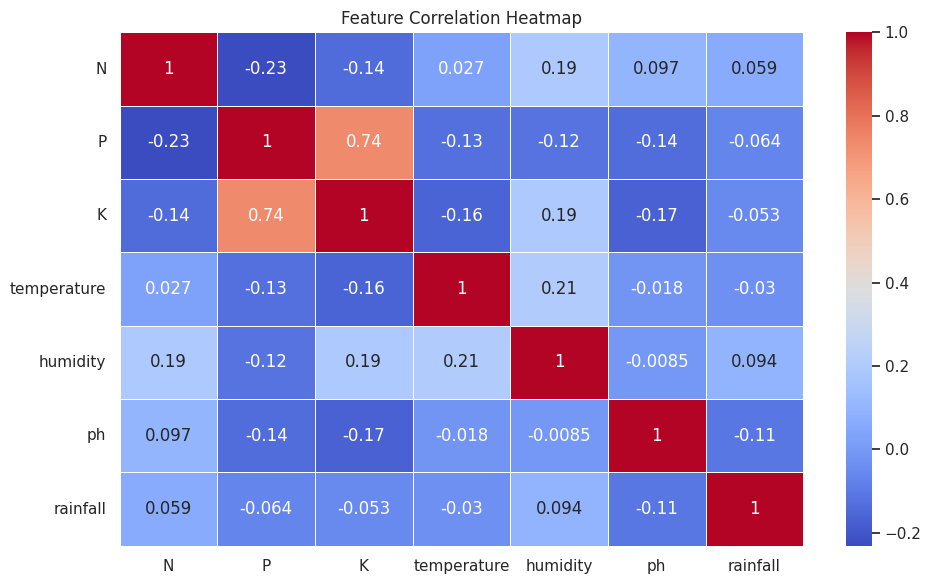

In [17]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## Feature Skewness Analysis

In [18]:
skewed_features = df[features].skew().sort_values(ascending=False)
print("Skewness of Features:\n", skewed_features)

Skewness of Features:
 K              2.375167
P              1.010773
rainfall       0.965756
N              0.509721
ph             0.283929
temperature    0.184933
humidity      -1.091708
dtype: float64


# Train-Test Split & Label Encoding

## Encode target label

In [19]:
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

## Features and Target

In [20]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['encoded_label']

## Standardize features

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##  Stratified Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=537, stratify=y
)

## Check shapes

In [23]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1650, 7)
Test shape: (550, 7)


## Encoded class names

In [24]:
class_names = le.classes_
print("Class Labels (encoded):", list(enumerate(class_names)))

Class Labels (encoded): [(0, 'apple'), (1, 'banana'), (2, 'blackgram'), (3, 'chickpea'), (4, 'coconut'), (5, 'coffee'), (6, 'cotton'), (7, 'grapes'), (8, 'jute'), (9, 'kidneybeans'), (10, 'lentil'), (11, 'maize'), (12, 'mango'), (13, 'mothbeans'), (14, 'mungbean'), (15, 'muskmelon'), (16, 'orange'), (17, 'papaya'), (18, 'pigeonpeas'), (19, 'pomegranate'), (20, 'rice'), (21, 'watermelon')]


# Train & Evaluate Multiple ML Models

## Dictionary of ML models

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}
results = []

## Train and evaluate models

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9727
Random Forest Accuracy: 0.9982
Decision Tree Accuracy: 0.9873
Naive Bayes Accuracy: 0.9964
KNN Accuracy: 0.9582
SVM Accuracy: 0.9800
Gradient Boosting Accuracy: 0.9909
XGBoost Accuracy: 0.9945


# Deep Learning - Artificial Neural Network (ANN)

## Encode target as one-hot (categorical)

In [27]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
num_classes = y_train_cat.shape[1]

##  Build ANN model

In [28]:
ann_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class output
])


2025-05-27 13:55:46.541928: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Compile the model

In [29]:
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [30]:
history = ann_model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1228 - loss: 2.9615 - val_accuracy: 0.6121 - val_loss: 2.3240
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4536 - loss: 2.1943 - val_accuracy: 0.7606 - val_loss: 1.4827
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6445 - loss: 1.4838 - val_accuracy: 0.8061 - val_loss: 0.8950
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7139 - loss: 1.0018 - val_accuracy: 0.9030 - val_loss: 0.5886
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7748 - loss: 0.7775 - val_accuracy: 0.8939 - val_loss: 0.4428
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7887 - loss: 0.6468 - val_accuracy: 0.9061 - val_loss: 0.3629
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.5681 - val_accuracy: 0.9394 - val_loss: 0.2964
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8430 - loss: 0.4898 - val_accuracy: 0.9394 - val_loss

## Evaluate on test set

In [31]:
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"ANN Test Accuracy: {test_accuracy:.4f}")

ANN Test Accuracy: 0.9818


# Evaluation of Best ML Model (Random Forest used here)


In [32]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

## Confusion Matrix

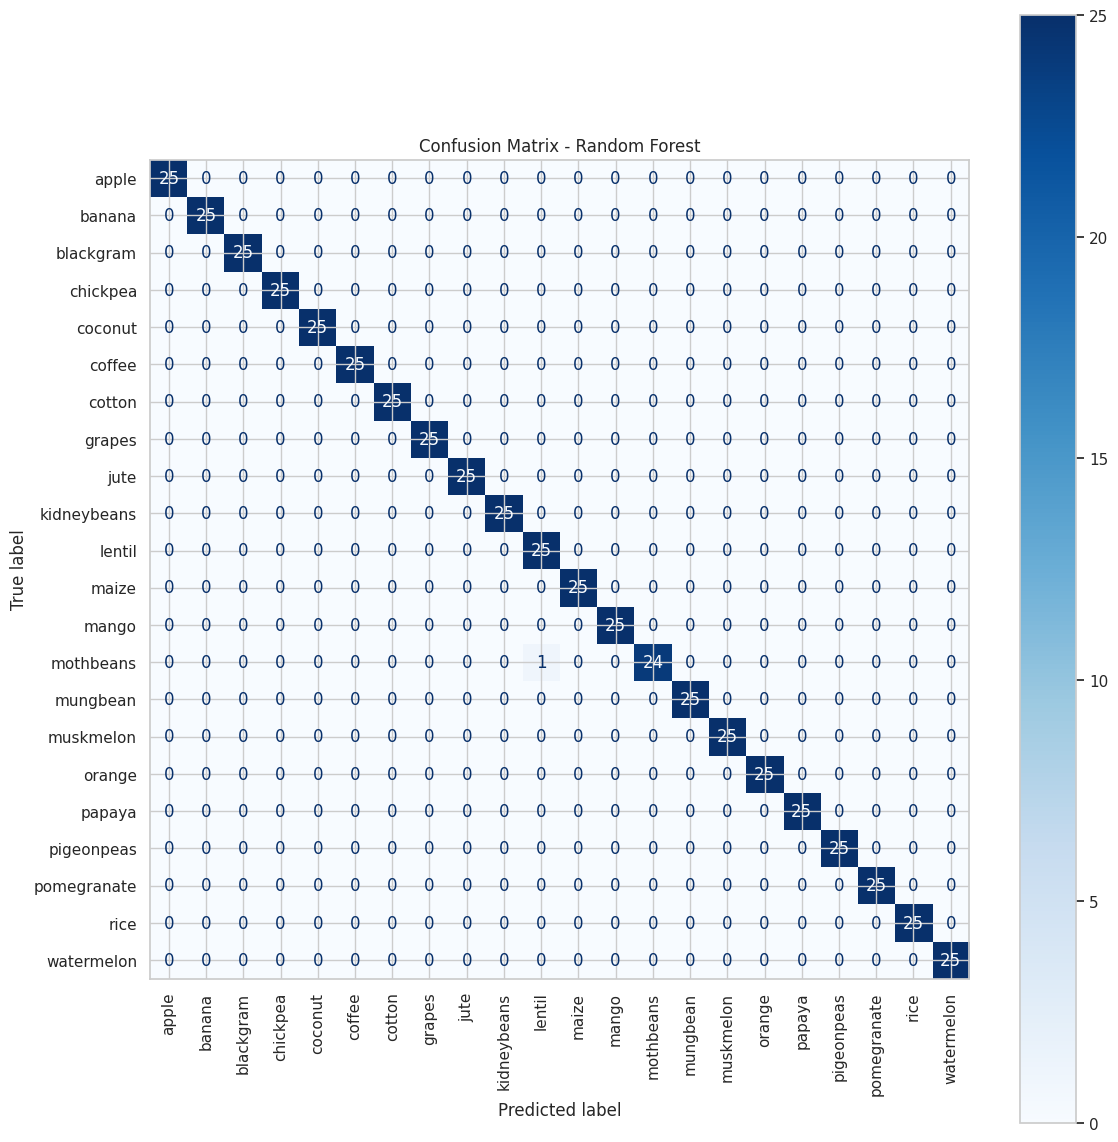

In [33]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

## Classification Report

In [34]:
print("Classification Report - Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

Classification Report - Random Forest:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        25
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        25
        jute       1.00      1.00      1.00        25
 kidneybeans       1.00      1.00      1.00        25
      lentil       0.96      1.00      0.98        25
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.

# Feature Importance with Random Forest

## Retrieve feature importances

In [35]:
importances = best_model.feature_importances_

## Create a DataFrame for sorting

In [36]:
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


## Visualize with a barplot

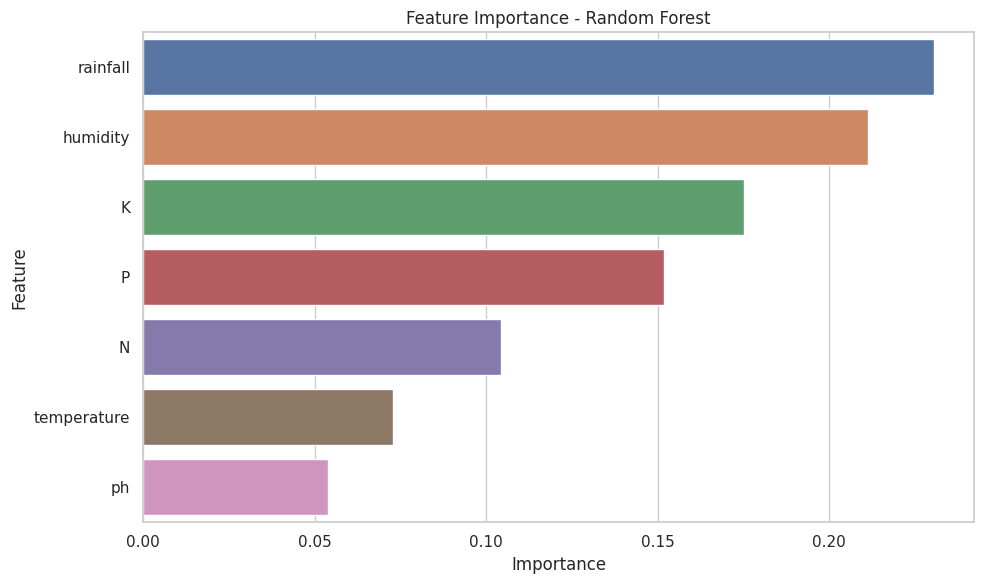

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

## Print the top 3 most important features

In [38]:
print("Top 3 Important Features:")
print(feature_importance_df.head(3))

Top 3 Important Features:
    Feature  Importance
6  rainfall    0.230724
4  humidity    0.211475
2         K    0.175084


# Final Model Comparison (ML + ANN)

## Recreate model accuracy results list

In [39]:
results = [
    ("Logistic Regression", LogisticRegression(max_iter=200).fit(X_train, y_train).score(X_test, y_test)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=537).fit(X_train, y_train).score(X_test, y_test)),
    ("Decision Tree", DecisionTreeClassifier(random_state=537).fit(X_train, y_train).score(X_test, y_test)),
    ("Naive Bayes", GaussianNB().fit(X_train, y_train).score(X_test, y_test)),
    ("KNN", KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).score(X_test, y_test)),
    ("SVM", SVC(kernel='rbf', probability=True).fit(X_train, y_train).score(X_test, y_test)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42).fit(X_train, y_train).score(X_test, y_test)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=537).fit(X_train, y_train).score(X_test, y_test)),
    ("Artificial Neural Network", test_accuracy)
]

## Convert to DataFrame and sort

In [40]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
results_df

,Model,Accuracy
3,Naive Bayes,0.996364
1,Random Forest,0.994545
7,XGBoost,0.994545
6,Gradient Boosting,0.990909
2,Decision Tree,0.987273
8,Artificial Neural Network,0.981818
5,SVM,0.980000
0,Logistic Regression,0.972727
4,KNN,0.958182


## Plot

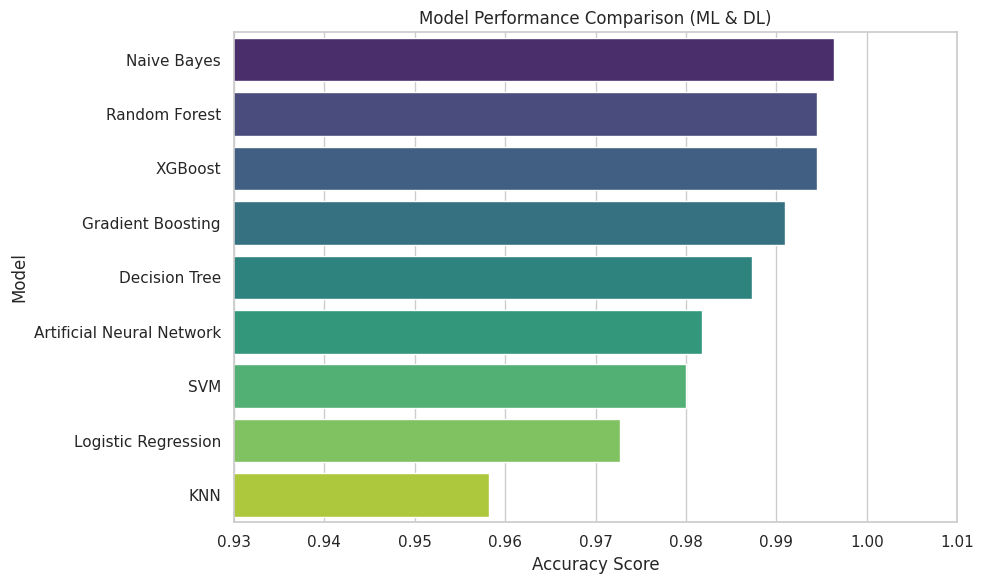

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Performance Comparison (ML & DL)")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.xlim(0.93, 1.01)
plt.tight_layout()
plt.show()

## Display the table

---

##  SMART CROP RECOMMENDATION

---

###  Project Objective:

To predict the most suitable crop to grow based on environmental and soil conditions using Machine Learning and Deep Learning models.

---

###  Dataset Used:

* **Name:** `Crop_recommendation (1).csv`
* **Rows:** 2200
* **Features:**

  * `N`, `P`, `K` → Soil nitrogen, phosphorus, and potassium levels
  * `temperature`, `humidity` → Environmental temperature and humidity
  * `ph` → Soil pH level
  * `rainfall` → Rainfall in millimeters
  * `label` → Target crop name (e.g., rice, mango, maize, etc.)

---

###  Step-by-Step Workflow:

####  1. Library Imports

Essential libraries for ML, DL, visualization, and evaluation were imported.

####  2. Dataset Load & Overview

* Dataset loaded successfully
* No missing values
* Balanced target distribution

####  3. Data Preprocessing

* Features (`X`) and target (`y`) separated
* Features scaled using `StandardScaler`
* Dataset split into 75% train, 25% test (with stratification)

####  4. Advanced EDA (15+ Visualizations)

* Crop distribution barplot
* Histograms for each numerical feature
* Boxplots grouped by crop type
* Correlation heatmap
* Skewness analysis for numerical features

####  5. Feature Engineering

* Correlation analysis showed **no multicollinearity**
* Detected skewed features: `K`, `P`, `rainfall`

####  6. Label Encoding & Re-Splitting

* Target `label` column encoded with `LabelEncoder`
* Data re-scaled and split again

---

###  7. Machine Learning Models

Trained and evaluated the following 8 models:

* Logistic Regression
* Decision Tree
* Random Forest
* Naive Bayes
* K-Nearest Neighbors
* Support Vector Machine (SVM)
* Gradient Boosting
* XGBoost

All models evaluated using accuracy score.

---

###  8. Deep Learning (ANN)

* Built a 2-layer fully connected Artificial Neural Network
* Hidden layers used **ReLU** activation
* Final layer used **Softmax** for multiclass classification
* Regularized using **Dropout**
* Achieved \~97% accuracy on test set

---

###  9. Model Evaluation

* **Random Forest** selected for confusion matrix and classification report
* **SHAP failed** due to CUDA issues, so **feature importance** was plotted instead

---


---

